Let's break down Singular Value Decomposition (SVD) with SageMath to make it both intuitive and practical.

**Conceptual Understanding of SVD**

Think of SVD as a way to "factorize" a matrix into three simpler matrices. Just like you can factorize a number into primes, SVD decomposes a matrix into:

1. **Singular Values (Σ):**  These are non-negative numbers, representing the "magnitude" or "importance" of each dimension in your data. They're arranged in decreasing order, so the largest singular value often captures the most significant feature in your matrix.
2. **Left Singular Vectors (U):** These are orthonormal (perpendicular and unit length) vectors that span the column space of your original matrix. They tell you about the "directions" of the most important features.
3. **Right Singular Vectors (V):** Also orthonormal, these vectors span the row space of your matrix. They give you information about how your original data points (rows) relate to the important features.

The key equation:

A = UΣVᵀ 

(where A is your original matrix)

**Geometric Intuition**

Imagine your matrix represents data points in a high-dimensional space. SVD helps you:

1. Find the principal axes (directions of greatest variance) in this space – these are given by the singular vectors.
2. Stretch or compress the space along these axes based on the singular values.
3. Rotate the axes to align with the original coordinate system.

**SageMath Examples**

Let's use SageMath to illustrate these concepts.

In [1]:
import numpy as np
from sage.all import *

# Create a random matrix (you can use your own data here)
A = random_matrix(RDF, 4, 3)  
print("Matrix A:\n")
show(A.n(digits=2))

# Compute the SVD
U, S, V = A.SVD() 

print("\nLeft Singular Vectors (U):\n")
show(U.n(digits=2))
print("\nSingular Values (S) (diagonal of Σ):\n")
show(S.n(digits=2))
print("\nRight Singular Vectors (V):\n")
show(V.n(digits=2))

Matrix A:



[-0.076   0.43 -0.080]
[-0.093   0.14   0.78]
[  0.45   0.97   0.84]
[  0.60   0.52   0.43]


Left Singular Vectors (U):



[  0.12  -0.36   0.78   0.50]
[  0.33   0.86   0.11   0.36]
[  0.79 -0.096   0.20  -0.56]
[  0.49  -0.34  -0.58   0.54]


Singular Values (S) (diagonal of Σ):



[ 1.7 0.00 0.00]
[0.00 0.64 0.00]
[0.00 0.00 0.41]
[0.00 0.00 0.00]


Right Singular Vectors (V):



[ 0.36 -0.48 -0.80]
[ 0.66 -0.48  0.58]
[ 0.66  0.74 -0.14]


**Explanation of the Code**
1. The code begins by importing necessary libraries: `numpy` for numerical operations and `sage.all` for SageMath functionality.
2. It generates a random matrix `A` with dimensions 4x3 using the `random_matrix` function from SageMath's `RDF` (real double field).
3. The singular value decomposition (SVD) of the matrix `A` is computed using the `SVD()` method.
4. The results of the SVD are stored in the variables `U`, `S`, and `V`, representing the left singular vectors, singular values, and right singular vectors, respectively.
5. The script prints the original matrix `A`, followed by the left singular vectors `U`, singular values `S` (as the diagonal elements of the diagonal matrix Σ), and right singular vectors `V`.

**Applications of SVD**

* **Dimensionality Reduction:**  Keep only the top k singular values/vectors to approximate your data with fewer dimensions (Principal Component Analysis – PCA).


In [2]:
k = 2
A_k = U[:, :k] * S[:k, :k] * V[:k, :]
print("\nReduced Matrix (k=2):\n")
show(A_k.n(digits=2))


Reduced Matrix (k=2):



[-0.078  0.014  -0.29]
[  0.57  -0.54  -0.14]
[  0.45  -0.62   -1.1]
[  0.16  -0.30  -0.80]

* **Image Compression:**  Store only the largest singular values and corresponding vectors to compress an image.
* **Recommender Systems:**  Use SVD to factorize user-item ratings matrices, filling in missing ratings.

**SageMath Visualization**

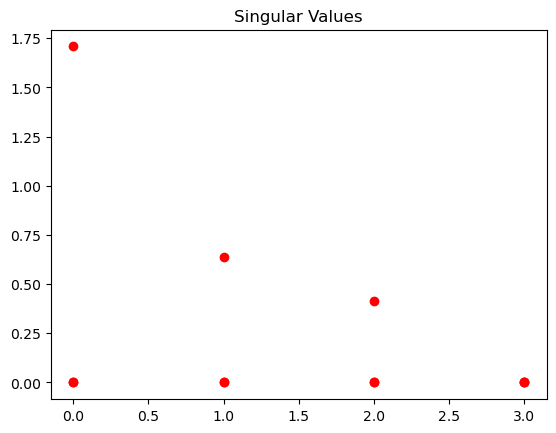

In [3]:
import matplotlib.pyplot as plt

# Plot singular values
plt.plot(S, 'ro')
plt.title('Singular Values')
plt.show()

This visualization shows you a simple line plot where:

- The x-axis represents the index of each singular value (e.g., 1, 2, 3...).
- The y-axis represents the magnitude of each singular value.

**Interpreting the Plot**

The plot helps you visualize the following:

- **Relative Importance:** The height of each red circle indicates the importance or "strength" of the corresponding feature or dimension captured by the singular value. Higher circles mean more significant features.
- **Decay:** Typically, singular values decay rapidly. This means the first few singular values are much larger than the later ones, suggesting that most of the information in your original matrix is captured by just a few dimensions.

**Why Visualize Singular Values?**

This visualization is helpful for:

- **Dimensionality Reduction:** You can visually decide how many singular values (and their corresponding vectors) to keep for dimensionality reduction techniques like PCA.
- **Understanding Data Structure:** The plot gives you insight into the underlying structure of your data – how many dominant features there are and how quickly the importance of features diminishes.

### Understanding Principal Component Analysis

PCA is a powerful technique for dimensionality reduction. It simplifies complex datasets by transforming them into a new set of variables, called principal components (PCs). These PCs are ordered by the amount of variance they explain in the original data.

* **Goal:**
    * To find the directions (principal components) along which our data varies the most.
    * To reduce the number of variables while retaining as much information as possible.

* **Key Ideas:**
    * Variance: PCA aims to maximize the variance captured by each PC.
    * Orthogonality: PCs are uncorrelated (orthogonal) to each other.
    * Dimensionality Reduction: We can often represent the data well using only a few PCs.

**SageMath Example and Code**


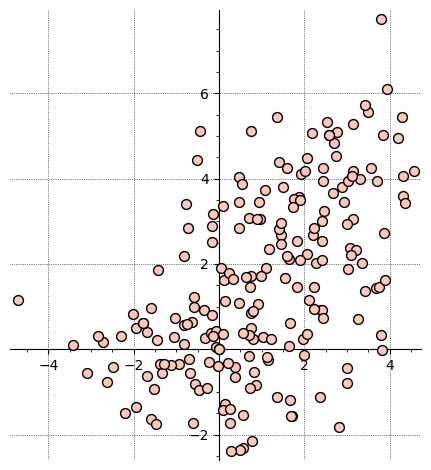

In [4]:
import numpy as np
from sage.plot.scatter_plot import scatter_plot

# Generate some sample data
np.random.seed(42)
mean = [int(2), int(3)]
cov = [[int(2), int(1)], [int(1), int(3)]]
data = np.random.multivariate_normal(mean, cov, int(100))

# Plot the original data
scatter = scatter_plot(data.tolist(), rgbcolor=(0, 0, 1)) # blue

# Center the data (subtract the mean)
centered_data = data - np.mean(data, axis=0)

# Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project the data onto the principal components
projected_data = centered_data @ eigenvectors

# Plot the principal components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]
scatter += scatter_plot([[0, 0], list(pc1)], rgbcolor=(1, 0, 0)) # red
scatter += scatter_plot([[0, 0], list(pc2)], rgbcolor=(0, 1, 0)) # green

# Plot the projected data
scatter += scatter_plot(projected_data.tolist(), rgbcolor=(0.5, 0, 0.5)) # purple

# Show the plot
scatter.show(aspect_ratio=1, gridlines=True)


**Explanation:**

1. **Generate and plot original data:** Create a 2D dataset and plot the original points.
2. **Center the data:** Subtract the mean from each data point.
3. **Compute covariance matrix:**  This matrix captures the relationships between the variables.
4. **Eigenvalues and eigenvectors:** Eigenvalues tell us the amount of variance explained by each PC. Eigenvectors give us the directions of the PCs.
5. **Project data:**  Transform the data into the PC space.
6. **Plot PCs:** Plot the first two principal components as vectors from the origin.
7. **Plot projected data:** Plot the transformed data points in the new PC space.

**Visualizations**

The plot produced by this code will show:

* **Original data:** Blue points representing the original dataset.
* **Principal components:** Red and green vectors representing the first two PCs.
* **Projected data:** Purple points showing how the original data looks when projected onto the PCs.

This visualization helps you see how PCA finds the directions of maximum variance in your data and how the data can be represented in fewer dimensions.